# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [69]:
# import libraries here
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('C:/Users/doris/Documents/data_analytics/lab_subsetting_and_descriptive_stats/your-code/Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
# your answer here
temp.info()
'''El data frame de temp contiene 7 observaciones con relacion a la temperatura de 3 estados de los estados unidos
pero en siete diferentes ciudades. En ese sentido hay 3 columnas: City y State con tipos de datos objeto y la columna
Temperature de tipo flotante'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


'El data frame de temp contiene 7 observaciones con relacion a la temperatura de 3 estados de los estados unidos\npero en siete diferentes ciudades. En ese sentido hay 3 columnas: City y State con tipos de datos objeto y la columna\nTemperature de tipo flotante'

#### Select the rows where state is New York

In [14]:
# your answer here
temp_New_York =temp[temp['State'] == 'New York'] #Obtenemos las filas del estado de New York, filtrando en una variable
temp_New_York

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [15]:
# your answer here
temp_New_York.mean() #Solo le aplicamos el metodo mean para asi obtener la media

C:\Users\doris\AppData\Local\Temp\ipykernel_36392\1801471712.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_New_York.mean()


Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [17]:
# your answer here
temp_above_15 = temp[temp['Temperature'] > 15]
temp_above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [21]:
# your answer here
temp_above_15_cities = temp_above_15.loc[(temp_above_15.loc[:, 'Temperature'] > 15), ['City']]
temp_above_15_cities 

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [25]:
# your answer here
temp_19_20 = temp_above_15.loc[(temp_above_15.loc[:, 'Temperature'] > 15) & (temp_above_15.loc[:, 'Temperature'] < 20),['City']]  
temp_19_20

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [30]:
# your answer here
mean_state = temp.groupby('State', as_index=False)['Temperature'].mean()   
print(mean_state)

         State  Temperature
0  Connecticut    15.833333
1   New Jersey    21.111111
2     New York    10.740741


In [31]:
std_state = temp.groupby('State', as_index=False)['Temperature'].std()   
print(std_state)

         State  Temperature
0  Connecticut     1.964186
1   New Jersey     1.571348
2     New York     8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [32]:
# your answer here
employee = pd.read_csv('C:/Users/doris/Documents/data_analytics/lab_subsetting_and_descriptive_stats/your-code/employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [33]:
# your answer here
employee.info()
"""La base de datos employee tiene 7 columnas de las cuales 5 son de tipo objeto y 2 de tipo entero. Y la base en si dispone
de 9 observaciones, describiendo los datos de 9 empleados con relacion al departamento donde laboran, el nivel de 
educacion, el genero, el puesto, tiempo de labor y el salario respectivamente"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [34]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the average salary in this company?

In [37]:
# your answer here
round(employee['Salary'].mean(),2)

48.89

#### What's the highest salary?

In [47]:
# your answer here
#employee.nlargest(1, ['Salary']) por esta via se obtienen las columnas con el salario mas alto
employee['Salary'].max() #solo obtenemos el salario mas alto

70

#### What's the lowest salary?

In [48]:
# your answer here
#employee.nsmallest(1, ['Salary']) por esta via se obtienen las columnas con el salario mas alto
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [50]:
# your answer here
employee.loc[employee['Salary'] == employee['Salary'].min(), ['Name', 'Salary']]

,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [55]:
# your answer here
employee.loc[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [56]:
# your answer here
employee.loc[employee['Name'] == 'David', ['Name','Salary']]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [58]:
# your answer here
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [59]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [60]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [64]:
# your answer here
employee.loc[(employee['Title']=='associate') & (employee['Salary']>55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [65]:
# your answer here
employee.groupby('Years', as_index=False)['Salary'].mean()   

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [66]:
# your answer here
employee.groupby('Title', as_index=False)['Salary'].mean()   

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

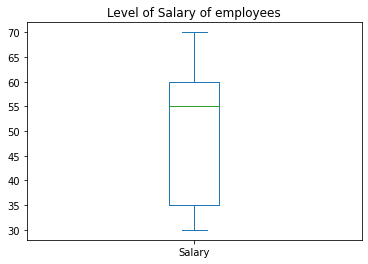

0.25    35.0
Name: Salary, dtype: float64


In [75]:
# print first quartile here
#boxplot = employee.boxplot(column=['Salary'], title='Marks of students')
#print(boxplot)
employee['Salary'].plot(kind='box', title='Level of Salary of employees')
plt.show()
"""En la caja de bigote la linea de fondo representa el primer cuartil que es 35, y el de arriba es el tercer cuartil """
Q_25 = employee.Salary.quantile([.25])
print(Q_25)

In [76]:
# print third quartile here
Q_75 = employee.Salary.quantile([.75])
print(Q_75)

0.75    60.0
Name: Salary, dtype: float64


#### Is the mean salary per gender different?

In [79]:
# your answer here
mean_gender = employee.groupby('Gender', as_index=False).agg({'Salary': np.mean})
mean_gender

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [80]:
# your answer here
numeric_mean = employee.groupby('Department', as_index=False).agg({'Salary': 'mean', 'Years': 'mean'})
numeric_min = employee.groupby('Department', as_index=False).agg({'Salary': 'min', 'Years': 'min'})
numeric_max = employee.groupby('Department', as_index=False).agg({'Salary': 'max', 'Years': 'max'})

In [82]:
print(numeric_mean) #el valor promedio del salario y los años por departamento 
print(numeric_min) #el valor minimo de del salario y los años por departamento
print(numeric_max) #el valor maximo de del salario y los años por departamento

  Department  Salary     Years
0         HR   45.00  4.666667
1         IT   48.75  4.500000
2      Sales   55.00  2.500000
  Department  Salary  Years
0         HR      30      2
1         IT      30      1
2      Sales      55      2
  Department  Salary  Years
0         HR      70      8
1         IT      70      8
2      Sales      55      3


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [ ]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here